# 约束最优化问题
$$
\begin{matrix}
min f(x)\\
s.t. h_i(x)=0\\
g_i(x)\le 0
\end{matrix}
\rightarrow
$$
在最小值处：
$$
\nabla f(x^*)+\sum_i\lambda_i \nabla  h_i(x^*)+\sum_i \mu_i \nabla g_i(x^*))=0\\
\mu_i g(x^*)=0
$$
所以原问题可以化为：
$$
min(f(x)+\sum_i \lambda_i h_i(x)+\sum_i \mu_i g_i(x))
$$

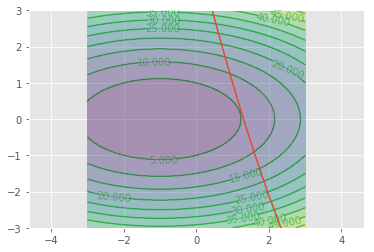

In [97]:
%matplotlib inline
# 展示了最小值x*处的梯度应该共线
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')

x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)
# 将原始数据变成网格数据
X, Y = np.meshgrid(x, y)

Z = X**2+2*X+Y**2*4+1
# 填充颜色
plt.contourf(X, Y, Z, 10, alpha = 0.4)
# 绘制等高线
C = plt.contour(X, Y, Z, 10, colors = '#009900', alpha=0.5)
# 显示各等高线的数据标签
plt.clabel(C, inline = True, fontsize = 10)
plt.axis('equal')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
xx = np.linspace(-3, 3, 1000)
yy = xx**2 * 0.3 - 4*xx+4.7
plt.plot(xx, yy)
plt.show()

# 不等式约束情况：
## 不等式取等号的情况下，$\mu_i\neq 0$
![](svm3.png)

# 补充：N维空间之中的k维曲面
N维空间之中的函数为：
$$f(x_1,\cdots, x_n)$$
若函数坐标满足函数关系：
$$g_i(x_1,\cdots, x_n)=0,i=1,\cdots n-k$$
则上式构成了N维空间之中的k维曲面，衍生出了流形概念。
约束最优化问题完成的是在k维曲面上的最小值问题。而不等式约束依然是在N维部分空间之中。
举个例子：
$$x+y+z=1$$
为三维空间之中的k维曲面。

# SVM分类函数
$$y=wx+b$$

样本数据点为$(x_i, d_i)$。可以确定权值w和偏置b使得所有数据点均满足：
$$(wx_i+b)d_i\ge 1\rightarrow (wx_i+b)d_i- 1\ge 0$$

将支持向量定义为
$(wx_s+b)d_s = 1$

支持向量距离到直线的距离为：
$$
r=\frac{1}{\sqrt{w^T\cdot w}}
$$

# 优化目标为拉格朗日函数
$$J=\frac{1}{2}w^T\cdot w-\sum_i^N\alpha_i[(wx_i+b)d_i- 1]$$

最优问题解由鞍点决定，因此符合两个条件：
$$\frac{\partial J}{\partial w}=0$$
$$\frac{\partial J}{\partial b}=0$$

In [2]:
import sympy as sym
sym.init_printing()

In [36]:
w, xi, b, di, ai = sym.symbols("w x_i b d_i a_i")

In [44]:
J=sym.S("1/2")*w*w-ai*((w*xi+b)*di-1)
J

In [38]:
J.diff(w)

In [39]:
J.diff(b)

In [40]:
wr = sym.solveset(J.diff(w), w)
wr

In [41]:
sym.expand(J)

$$a_i b d_i=0$$

$$-a_i d_i w x_i+w^2/2=-\frac{1}{2}\sum_i \sum_j a_i d_i x_i a_j d_j x_j$$

# 最终拉格朗日函数变为：
$$Q(\alpha)=\sum_i^N \alpha_i - \frac 1 2 \sum_i^N \sum_i^N \alpha_i \alpha_j d_i d_j x_i x_j
$$

# 松弛变量

线性不可分问题边界为：
$$(wx_i+b)d_i\ge 1-\xi_i$$
支持向量定义为：
$$(wx_s+b)d_s= 1-\xi_s$$

当$\xi<0$时对应正常情况，当$0<\xi\le 1$是在分类区域内，但是在决策曲面正确的一侧，当$\xi>1$在决策曲面错误一侧。

我们目标是使得整个超平面上错误目标最小，因此在损失函数之中引入新项：
$$\Phi(\xi)=\sum_i Unit(\xi_i)(\xi_i-1)$$
简化，使得NP完全问题变为可解问题：
$$\Phi(\xi)=\sum_i \xi_i$$

最优化目标最终变为：
$$\Phi(w)=\frac{1}{2}w^T w+C\sum \xi_i$$

# 优化目标为拉格朗日函数
$$J=\frac{1}{2}w^T\cdot w+C\sum_i \xi_i -\sum_i^N\alpha_i[(wx_i+b)d_i- 1+\xi_i]$$
$$\xi_i\ge 0$$

In [56]:
w, xi, b, di, ai, xii, C= sym.symbols("w x_i b d_i a_i e_i C")

In [60]:
J=sym.S("1/2")*w*w+C*xii-ai*((w*xi+b)*di-1+xii)
J

In [61]:
J.diff(w)

In [62]:
J.diff(b)

In [63]:
J.diff(xii)

In [64]:
sym.expand(J)

**加入松弛变量后整个最大化目标并未改变，仅约束条件变化：**
$$\alpha_i\ge 0 \rightarrow 0\le \alpha_i \le C$$

# 预测过程为
$$wx+b=0$$
$$\sum_i a_i d_i x_i x^s+b=1$$

# 为了解决线性不可分问题引入核函数
$$Q(\alpha)=\sum_i^N \alpha_i - \frac 1 2 \sum_i^N \sum_i^N \alpha_i \alpha_j d_i d_j k(x_i, x_j)
$$
其中:

|支持向量|$k(x, x_i)$|指定参数|
|--:|--:|--:|
|多项式|$(x^T x_i)^p$|p|
|径向基函数|$e^{-\frac{1}{2\sigma^2}||x-x_i||}$|$\sigma$|

## 预测过程
决策曲面为
$$\sum_i^s \alpha_i d_i k(x,x_i)=0$$